# Lasso StandardScaler Grid model

#### 1. 준비

In [1]:
# 관련 라이브러리 및 모듈 Import
# import
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.linear_model import SGDRegressor

from sklearn.preprocessing import StandardScaler

from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error, r2_score

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings(action='ignore')

In [3]:
def evaluate_score(y_test, y_pred):
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    print(f'mse- {mse:.3f}')
    print(f'rmse- {rmse:.3f}')
    print(f'r2- {r2:.3f}')
    
    return

### 데이터 수집, 탐색, 준비

####  데이터셋에 대한 설명 및 정보 확인

In [4]:
# 데이터 csv 불러오기
train = pd.read_csv('./train5.csv')

In [5]:
# X(독립변수), Y(종속변수) 분할
X = train.drop('match', axis=1)
y = train['match']
# 학습용 데이터와 평가용 데이터로 분할하기
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### 라쏘 모델 scaling, GridSerchCV

In [6]:
# 데이터 로드
X = train.drop('match', axis=1)
y = train['match']
# 학습용 데이터와 평가용 데이터로 분할하기
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 파이프라인 정의
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('lasso', Lasso())
])

# 탐색할 하이퍼파라미터 값 지정
param_grid = {
    'lasso__alpha': [0.001, 0.01, 0.1, 1, 10]
}

# 그리드 서치 객체 생성
grid_search = GridSearchCV(pipeline, param_grid, cv=5)

# 모델 학습
grid_search.fit(X_train, y_train)

# 최적의 모델 선택
best_model = grid_search.best_estimator_

# 최적의 하이퍼파라미터 출력
print("Best Parameters: ", grid_search.best_params_)

# 예측
y_pred = best_model.predict(X_test)
y_pred[y_pred < 0] = 0.
# 모델 성능 평가
evaluate_score(y_test, y_pred)

Best Parameters:  {'lasso__alpha': 1}
mse- 460.834
rmse- 21.467
r2- 0.191


In [7]:
#라쏘 모델 회귀 계수
Lasso_coef = pd.Series(best_model.named_steps['lasso'].coef_, index=X.columns)
Lasso_coef

gender        0.268990
attr_s        0.237538
sinc_s        0.000000
intel_s       0.041845
fun_s         0.695683
amb_s         0.319208
attr_eval     3.819716
sinc_eval     0.000000
intel_eval    0.000000
fun_eval      0.000000
amb_eval      0.111539
shar_eval     4.482124
like_eval     1.058784
dtype: float64

### 계수 시각화

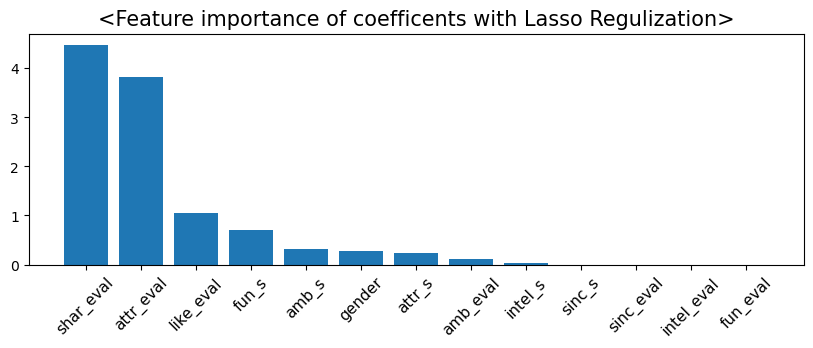

In [8]:
coef = np.abs(Lasso_coef)
coef = pd.Series(coef, index=X.columns).sort_values(ascending=False)
coef
# 시각화
plt.figure(figsize=(10,3))
plt.title('<Feature importance of coefficents with Lasso Regulization>', fontsize=15)
plt.bar(coef.index, coef.values)
plt.xticks(coef.index, rotation=45, fontsize=11);

##### 독립변수가 여러 개일 때 모델의 성능을 시각화하려면 실제값과 예측값의 분포 차이를 그린다.
- 실제값과 예측값이 같을수록 x,y가 같은 곳을 찍어서 y = x 그래프를 그리게 될 것이다.

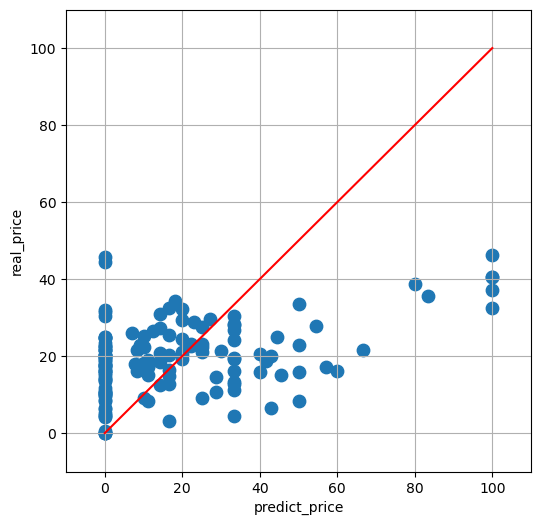

In [9]:
plt.figure(figsize = (6,6))
plt.scatter(y_test,y_pred,s = 80)
plt.grid()
plt.ylabel('real_price')
plt.xlabel('predict_price')
plt.xlim([-10, 110])
plt.ylim([-10, 110])
plt.plot([0,100],[0,100],c = 'r')
plt.show()

### 변수 간의 상관관계를 히트맵으로 시각화 및 탐색

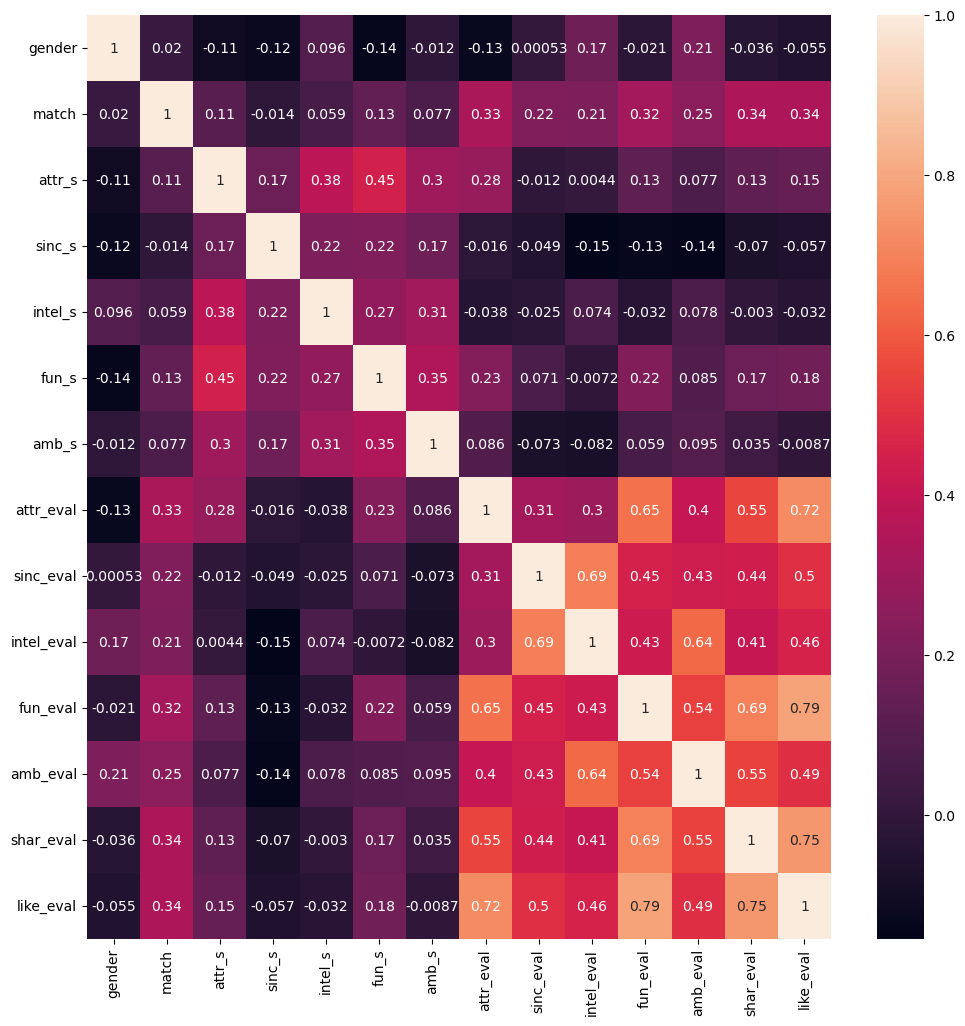

In [10]:
# 상관계수를 구하여 저장
corr_df = train.corr()
corr_df.corr()

# 상관계수를 히트맵으로 시각화
import seaborn as sns
plt.figure(figsize = (12,12))
sns.heatmap(corr_df, annot=True);

### 예측값

In [11]:
y_pred

array([17.55412651, 14.47136192, 13.50164323, 30.42672559, 18.18924641,
       40.43760902, 17.19203777, 19.79434105, 33.39852665, 24.88313826,
        9.18475658,  9.18355567, 30.94945068, 17.63073905, 20.19741576,
        6.56253088,  0.        , 24.90316564, 23.19240995, 10.58951788,
       18.87333822, 46.13871302, 27.223795  , 11.28039614, 21.08395643,
       21.19596906, 44.36739515, 16.24206354, 20.24319537, 20.13656646,
        8.33840546, 34.42649245, 28.01146418, 22.38913614, 22.89370977,
        6.41091751, 12.75884327, 28.81073328, 22.69726555,  8.35228695,
       26.74283388,  8.50585203, 10.42271744, 25.43103474, 26.58757488,
       16.01998139,  4.43895137, 20.00988041, 21.70064022, 29.42929263,
       17.4378634 , 22.61979059, 17.48033365, 27.91747379,  5.10019303,
       21.6477687 , 17.65586377, 19.20729009, 19.51280473,  0.        ,
       21.11424527, 16.02335501, 14.93976825, 15.85094308, 25.07675063,
       29.63298878, 22.2713194 ,  9.94591444, 32.07155168, 19.32